### Étape 1 : Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

### Étape 2 : Définition de la classe `IMPNode`

In [2]:
class IMPNode:
    # Nombre maximal de voisins qu'un nœud peut avoir
    MAX_NEIGHBORS = 4

    def __init__(self, center):
        self.center = center  # Coordonnées du centre du nœud
        self.my_neighbors = set()  # Ensemble des voisins du nœud

    def get_center(self):
        # Retourne les coordonnées du centre du nœud
        return self.center

    def add_neighbor(self, neighbor):
        # Ajoute un voisin au nœud
        # Retourne False si l'ajout n'est pas possible
        if self == neighbor or neighbor in self.my_neighbors or not self.accept_neighbors() or not neighbor.accept_neighbors():
            return False
        self.my_neighbors.add(neighbor)
        neighbor.my_neighbors.add(self)
        return True

    def is_neighbor(self, node):
        # Vérifie si le nœud passé en paramètre est un voisin
        return node in self.my_neighbors

    def accept_neighbors(self):
        # Vérifie si le nœud peut accepter d'autres voisins
        return len(self.my_neighbors) < IMPNode.MAX_NEIGHBORS

### Étape 3 : Définition de la classe `Network`

In [4]:
class Network:
    def __init__(self, dimension):
        self.dimension = dimension  # Dimensions de l'espace du réseau
        self.nodes = set()  # Ensemble des nœuds dans le réseau

    def create_and_link_nodes(self, nb_nodes):
        # Crée et relie les nœuds dans le réseau
        self.nodes.clear()
        node_positions = defaultdict(bool)  # Dictionnaire pour stocker les positions des nœuds

        # Création des nœuds
        while len(self.nodes) < nb_nodes:
            x = random.randint(0, self.dimension[0])
            y = random.randint(0, self.dimension[1])
            point = (x, y)
            if not node_positions[point]:
                node = IMPNode(point)
                self.nodes.add(node)
                node_positions[point] = True

        # Création des liens entre les nœuds
        for node1 in self.nodes:
            for node2 in self.nodes:
                if self.get_nb_jumps(node1, node2, 0, set()) == 0:
                    node1.add_neighbor(node2)

        for node1 in self.nodes:
            for node2 in self.nodes:
                if self.get_nb_jumps(node1, node2, 0, set()) > 1:
                    node1.add_neighbor(node2)

    def get_nodes(self):
        # Retourne l'ensemble des nœuds du réseau
        return self.nodes

    def draw(self):
        # Dessine le réseau
        G = nx.Graph()
        for node in self.nodes:
            G.add_node(node.get_center())
            for neighbor in node.my_neighbors:
                G.add_edge(node.get_center(), neighbor.get_center())
        random_seed = random.randint(0, 1000)
        pos = nx.spring_layout(G, seed=random_seed)  # Utilisation de l'algorithme de layout "spring_layout"
        nx.draw(G, pos, node_color='b', with_labels=False, node_size=10)
        plt.show()

    def get_nb_jumps(self, node1, node2, nb_jumps, checked):
        # Calcule le nombre de sauts nécessaires pour aller de node1 à node2
        if node1.is_neighbor(node2):
            return nb_jumps + 1

        checked.add(node1)
        min_jumps = float('inf')

        for n in node1.my_neighbors:
            if n not in checked:
                current = self.get_nb_jumps(n, node2, nb_jumps + 1, checked)
                if current > 0:
                    min_jumps = min(current, min_jumps)

        return 0 if min_jumps == float('inf') else min_jumps
    
    def calculate_diameter(self):
        # Calcule le diamètre du réseau
        G = nx.Graph()
        for node in self.nodes:
            for neighbor in node.my_neighbors:
                G.add_edge(node.get_center(), neighbor.get_center())

        diameter = nx.diameter(G)
        return diameter

### Étape 4 : Paramètres et création du réseau

In [5]:
# Définition des dimensions et du nombre de nœuds souhaités
dimension = (800, 600)
nb_nodes = 9

# Création du réseau et calcul du diamètre
network = Network(dimension)
network.create_and_link_nodes(nb_nodes)

### Étape 5 : Calcul et affichage du diamètre du réseau

In [6]:
# Calcul du diamètre du réseau
diameter = network.calculate_diameter()
# Affichage du résultat et du dessin du réseau
print("Diamètre du réseau:", diameter)

Diamètre du réseau: 3


### Étape 6 : Affichage du graphe du réseau

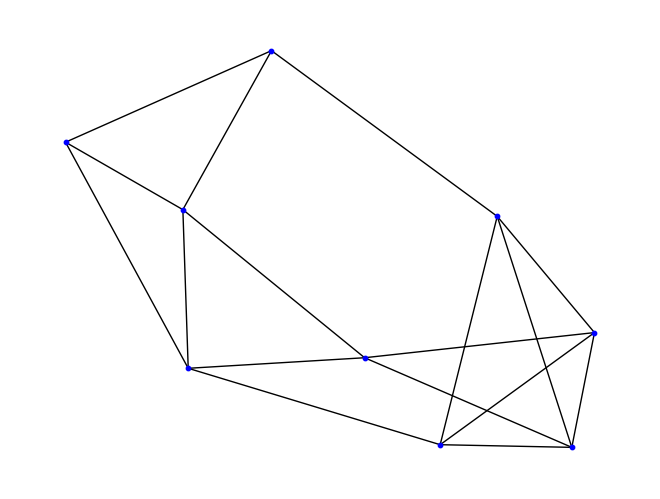

In [7]:
network.draw()